In [11]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import burst_detector as bd
import scipy.io
import math

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# loading data
fs = 30000
times = np.load('../results/s0_matlab/spike_times.npy').flatten()/fs
clusters_old = np.load('../results/s0_matlab/spike_clusters.npy').flatten()
amplitudes = np.load('../results/s0_matlab/amplitudes.npy').flatten()

n_clusters = np.unique(clusters_old).size
n = times.shape[0]

In [3]:
# fix cluster numbering
clusters, fix_clust = bd.fix_clust_ids(clusters_old, n_clusters)

In [4]:
st0 = np.array(bd.find_times(times, clusters, [0])[0])

In [5]:
Kxxb_mat = scipy.io.loadmat("Kxxb.mat")['Kxxb']
Kxbxb_mat = scipy.io.loadmat("Kxbxb.mat")['Kxbxb']

In [6]:
tLims = [0, 190]
dt = 0.1

In [7]:
x = bd.fit_PoissonGP(st0, [.5], [0, 190], .1)

Optimization terminated successfully.
         Current function value: -45.549200
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 15
         Hessian evaluations: 13


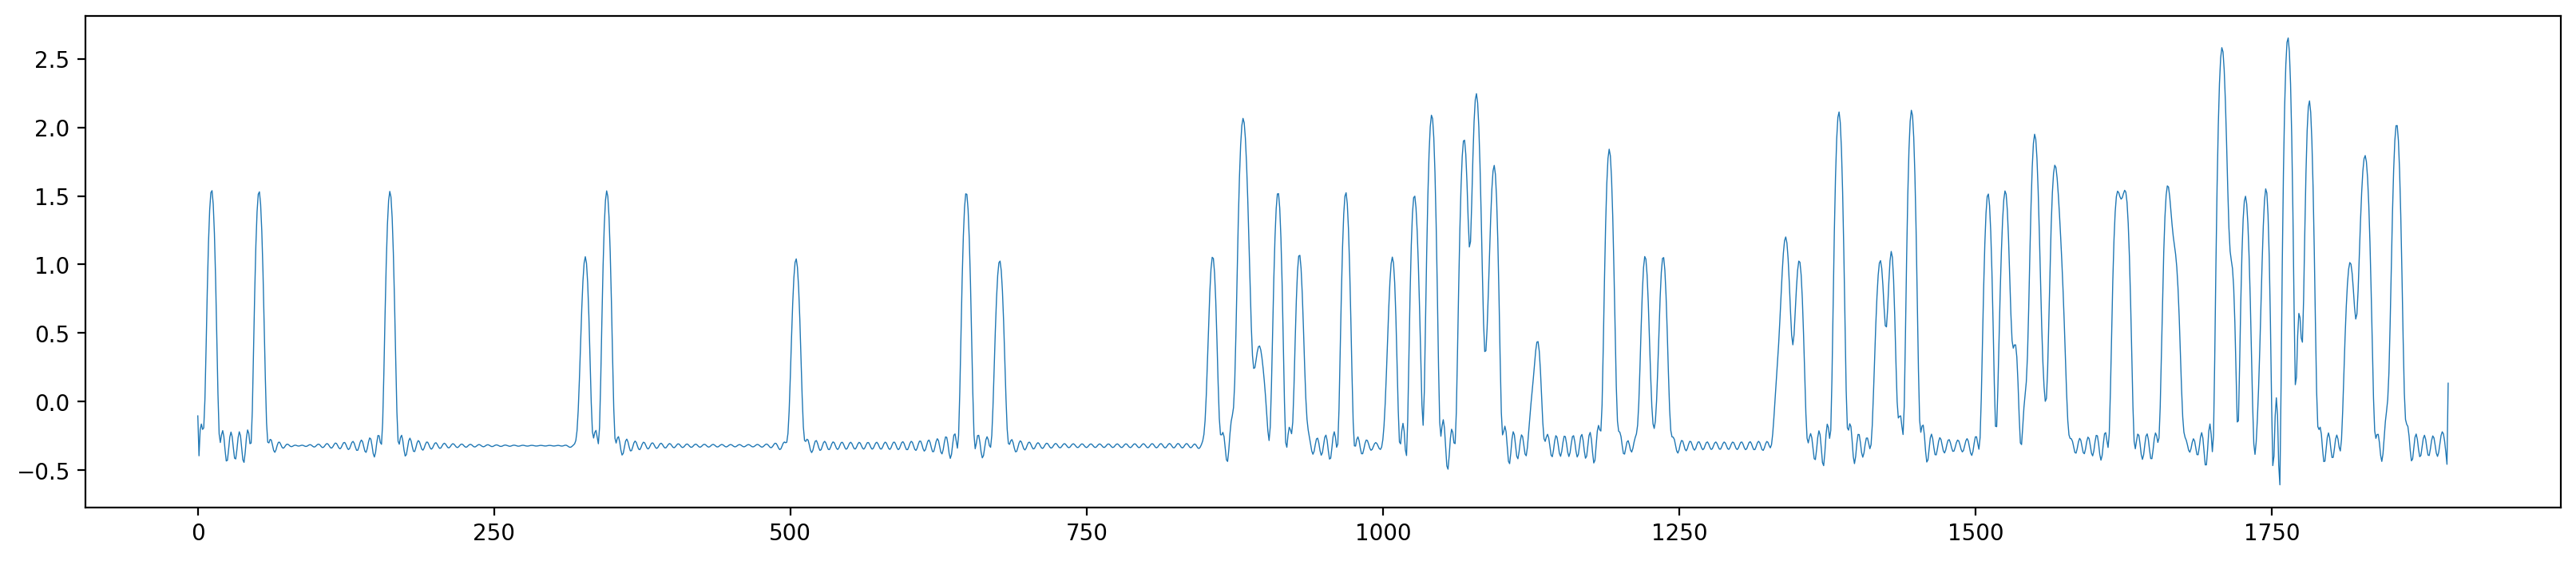

In [14]:
plt.figure(figsize=(20, 4))
plt.plot(x, linewidth=0.5)